In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [141]:
df = pd.read_csv('Passengers.csv', usecols = ['Year','Month','DOMESTIC','INTERNATIONAL','TOTAL'])
df.head()

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,48054917,9578435,57633352
1,2002,11,44850246,9016535,53866781
2,2002,12,49684353,10038794,59723147
3,2003,1,43032450,9726436,52758886
4,2003,2,41166780,8283372,49450152


In [142]:
df.describe()

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
count,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02
mean,2012.584677,6.483871,5.484616e+07,1.389013e+07,6.873628e+07
std,5.989269,3.481551,1.031117e+07,4.283557e+06,1.420381e+07
min,2002.000000,1.000000,2.879712e+06,3.729150e+05,3.281041e+06
25%,2007.000000,3.000000,5.048308e+07,1.167299e+07,6.272726e+07
50%,2013.000000,6.000000,5.586459e+07,1.369708e+07,6.977755e+07
75%,2018.000000,10.000000,6.048862e+07,1.660171e+07,7.690114e+07
max,2023.000000,12.000000,7.528192e+07,2.390786e+07,9.918978e+07


In [143]:
df.shape

(248, 5)

In [144]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           248 non-null    int64
 1   Month          248 non-null    int64
 2   DOMESTIC       248 non-null    int64
 3   INTERNATIONAL  248 non-null    int64
 4   TOTAL          248 non-null    int64
dtypes: int64(5)
memory usage: 9.8 KB


In [145]:
grouped_df = df.groupby('Year')[['DOMESTIC','INTERNATIONAL', 'TOTAL']].sum().reset_index()
grouped_df

,Year,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,142589516,28633764,171223280
1,2003,583293766,117569855,700863621
2,2004,629769616,133940075,763709691
3,2005,657261487,143588422,800849909
4,2006,658362620,149740591,808103211
5,2007,679185450,156324972,835510422
6,2008,651710182,158111711,809821893
7,2009,618067255,149749333,767816588
8,2010,629537593,157940463,787478056
9,2011,638247667,163887126,802134793


In [146]:
x = grouped_df['Year']
y = grouped_df['TOTAL']

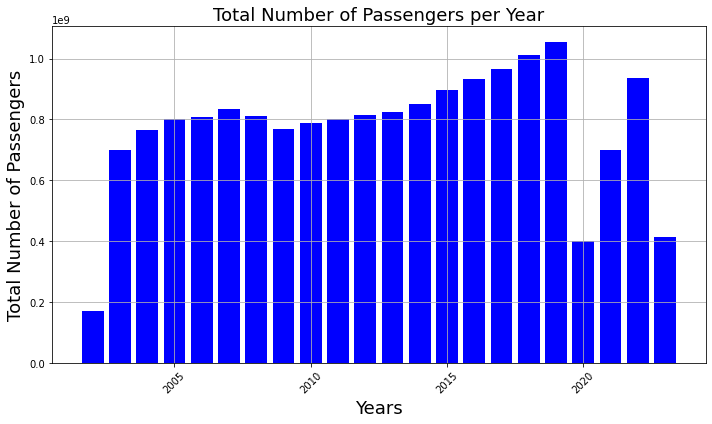

In [147]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='b')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Total Number of Passengers', fontsize=18)
plt.title('Total Number of Passengers per Year', fontsize=18)
plt.xticks(rotation=45)  #

plt.grid(True)
plt.tight_layout()

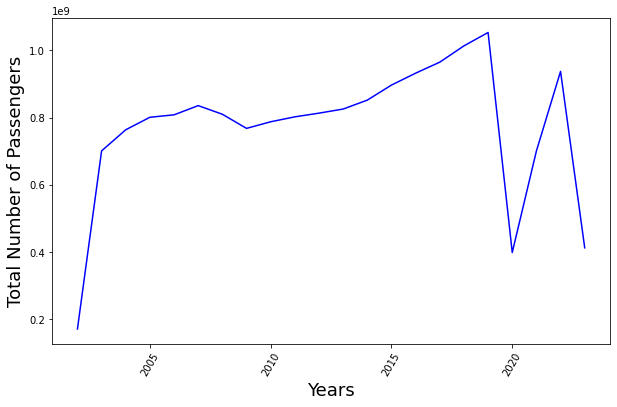

In [148]:
plt.figure(figsize=(10,6))
plt.plot(x,y, color = 'b')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Total Number of Passengers', fontsize=18)
plt.xticks(rotation =60)
plt.show()

In [149]:
domestic = grouped_df['DOMESTIC']
international = grouped_df['INTERNATIONAL']
total = grouped_df['TOTAL']

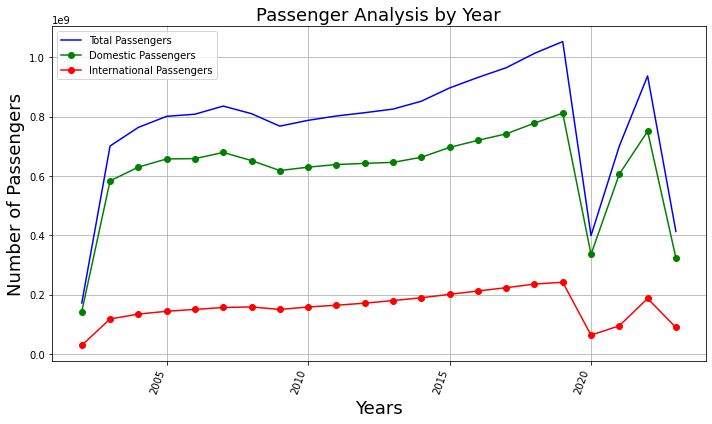

In [150]:
# Create a bar plot for 'TOTAL' passengers
plt.figure(figsize=(10, 6))
plt.plot(x, total, color='b', label='Total Passengers')

# Create line plots for 'DOMESTIC' and 'INTERNATIONAL' passengers
plt.plot(x, domestic, marker='o', color='g', label='Domestic Passengers')
plt.plot(x, international, marker='o', color='r', label='International Passengers')

plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of Passengers', fontsize=18)
plt.title('Passenger Analysis by Year', fontsize=18)
plt.legend()  # Show legend for different lines
plt.xticks(rotation=70, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [151]:
corr = df[['Year','DOMESTIC','INTERNATIONAL', 'TOTAL']].corr()
corr

,Year,DOMESTIC,INTERNATIONAL,TOTAL
Year,1.000000,0.146137,0.276202,0.189384
DOMESTIC,0.146137,1.000000,0.872557,0.989088
INTERNATIONAL,0.276202,0.872557,1.000000,0.935006
TOTAL,0.189384,0.989088,0.935006,1.000000


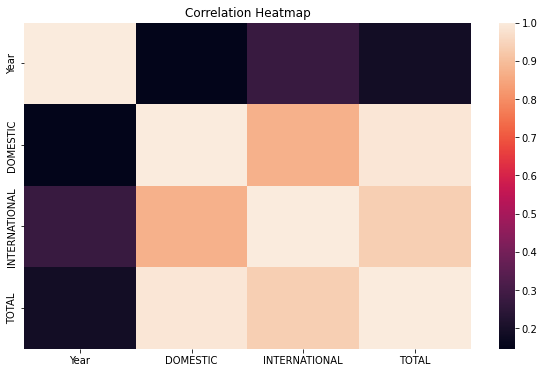

In [152]:
plt.figure(figsize=(10,6))
sns.heatmap(corr)
plt.title("Correlation Heatmap")
plt.show()

In [153]:
X = df[['Year']]  # Use relevant features
y_domestic = df['DOMESTIC']
y_international = df['INTERNATIONAL']
y_total = df['TOTAL']

In [154]:
X_train, X_test, y_train_domestic, y_test_domestic, y_train_international, y_test_international, y_train_total, y_test_total = train_test_split(
    X, y_domestic, y_international, y_total, test_size=0.2, random_state=42)

In [155]:
# Define and train the XGBoost models for each target
model_domestic = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model_international = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model_total = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

In [156]:
model_domestic.fit(X_train, y_train_domestic)
model_international.fit(X_train, y_train_international)
model_total.fit(X_train, y_train_total)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [157]:
y_pred_domestic = model_domestic.predict(X_test)
y_pred_international = model_international.predict(X_test)
y_pred_total = model_total.predict(X_test)

In [158]:
# Evaluate the models' performance for each target
mae_domestic = mean_absolute_error(y_test_domestic, y_pred_domestic)
mae_international = mean_absolute_error(y_test_international, y_pred_international)
mae_total = mean_absolute_error(y_test_total, y_pred_total)

In [159]:
# Predict the number of passengers for the next year using the trained models
next_year_data = pd.DataFrame({'Year': [next_year]})
next_year_prediction_domestic = model_domestic.predict(next_year_data)
next_year_prediction_international = model_international.predict(next_year_data)
next_year_prediction_total = model_total.predict(next_year_data)


In [160]:
x_extended = np.append(x, next_year)


In [161]:
# Extend your data arrays with the predicted values for the upcoming year
domestic_extended = np.append(domestic, next_year_prediction_domestic)
international_extended = np.append(international, next_year_prediction_international)
total_extended = np.append(total, next_year_prediction_total)


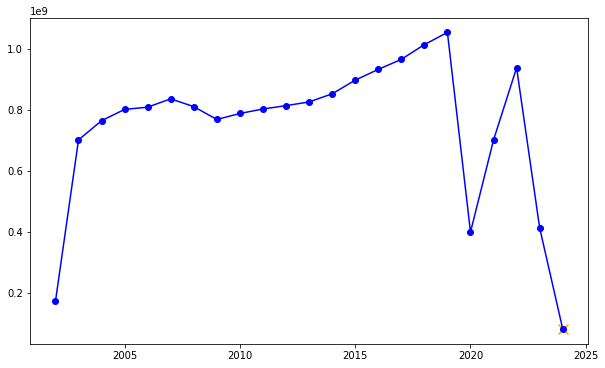

In [162]:
# Create a bar plot for 'TOTAL' passengers with predicted value for the upcoming year
plt.figure(figsize=(10, 6))
plt.plot(x_extended, total_extended, color='b', label='Total Passengers', marker='o')
plt.scatter(next_year, next_year_prediction_total, color='orange', marker='x', s=100, label='Predicted Total Passengers (Next Year)')

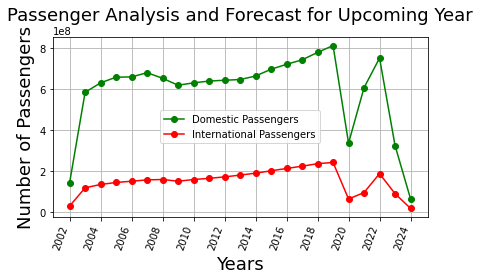

In [163]:
# Create line plots for 'DOMESTIC' and 'INTERNATIONAL' passengers with predicted values for the upcoming year
plt.plot(x_extended, domestic_extended, marker='o', color='g', label='Domestic Passengers')
plt.plot(x_extended, international_extended, marker='o', color='r', label='International Passengers')

plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of Passengers', fontsize=18)
plt.title('Passenger Analysis and Forecast for Upcoming Year', fontsize=18)
plt.legend()  # Show legend for different lines

# Set custom x-axis ticks with 2-year intervals
plt.xticks(np.arange(min(x), max(x_extended) + 1, step=2))

plt.xticks(rotation=70, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()